In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
import matplotlib.dates as mdates
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from garch_analysis import GARCHAnalysis

In [ ]:
# # Download latest version
# path = kagglehub.dataset_download("camnugent/sandp500")

# print("Path to dataset files:", path)

In [ ]:
file_path = r"C:\Users\simoo\.cache\kagglehub\datasets\camnugent\sandp500\versions\4\all_stocks_5yr.csv"
main_df = pd.read_csv(file_path)
main_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [ ]:
# Set stock of interest
ticker = 'AAPL'

# Filter on ticker above
stock_df = main_df[main_df['Name']==ticker].copy().reset_index(drop=True)

# Set date column
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [6]:
# Quick check for missing values
stock_df.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

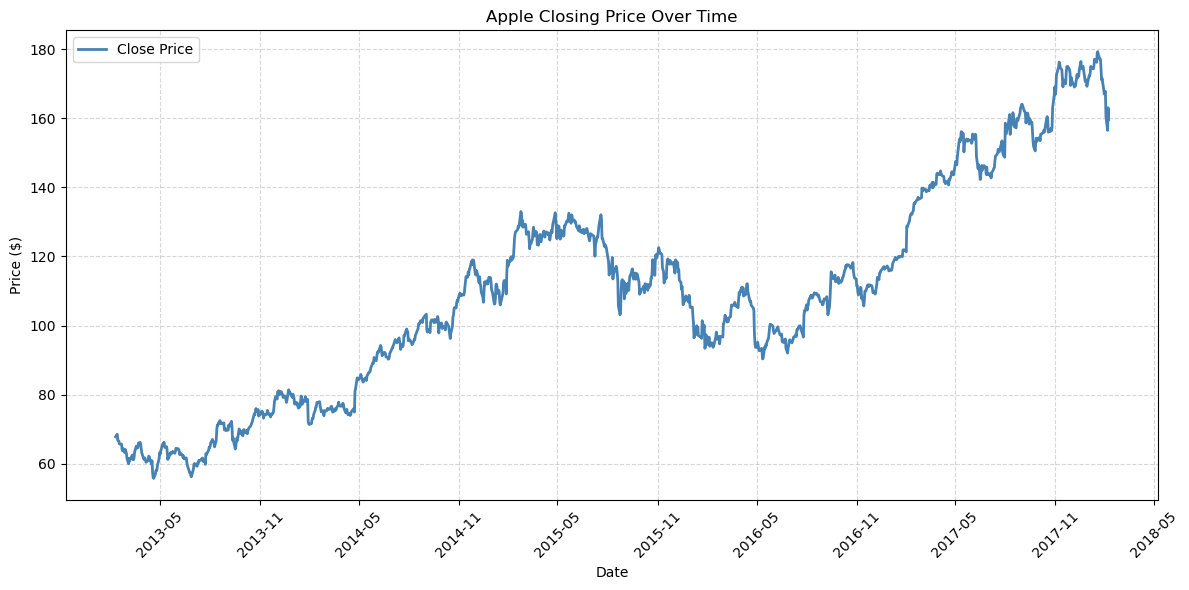

In [8]:
X = stock_df['date']
y = stock_df['close']

plt.figure(figsize=(12, 6))
plt.plot(X, y, color='steelblue', linewidth=2, label='Close Price')

plt.title('Apple Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Formatera datumaxel
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [9]:
# Calculate returns and log returns 
stock_df['returns'] = stock_df['close'] / stock_df['close'].shift(1)
stock_df['log_returns'] = np.log(stock_df['returns'])

In [10]:
# Let's drop rows with missing values(i.e. the first row)
stock_df.dropna(inplace=True)

In [11]:
stock_df

,date,open,high,low,close,volume,Name,returns,log_returns
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.010422,0.010368
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,0.974933,-0.025386
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,0.998097,-0.001905
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.999101,-0.000900
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,0.986220,-0.013876
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,1.002090,0.002088
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,0.956610,-0.044360
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,0.975016,-0.025302
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,1.041792,0.040942


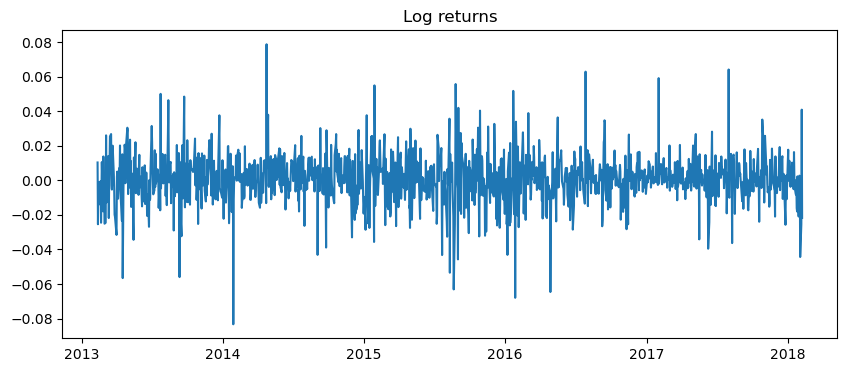

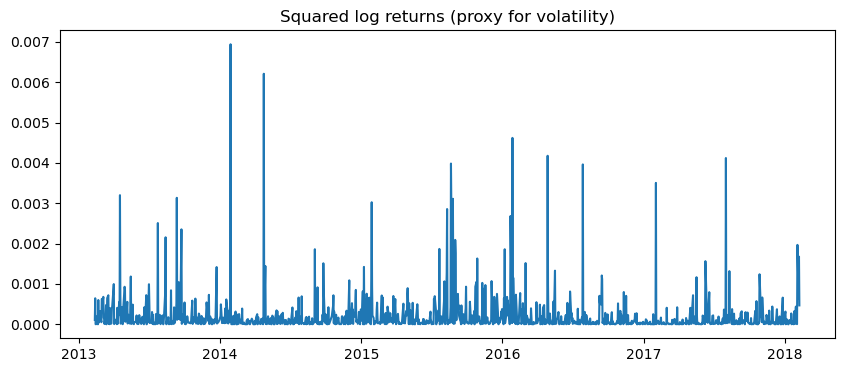

In [12]:
plt.figure(figsize=(10,4))
plt.plot(stock_df['date'], stock_df['log_returns'])
plt.title('Log returns')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(stock_df['date'], stock_df['log_returns']**2)
plt.title('Squared log returns (proxy for volatility)')
plt.show()

In [13]:
stock_df


,date,open,high,low,close,volume,Name,returns,log_returns
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.010422,0.010368
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,0.974933,-0.025386
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,0.998097,-0.001905
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.999101,-0.000900
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,0.986220,-0.013876
...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,1.002090,0.002088
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,0.956610,-0.044360
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,0.975016,-0.025302
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,1.041792,0.040942


In [16]:
log_returns = stock_df['log_returns']

for lag in [1, 5, 10, 20]:
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(log_returns, nlags=lag)
    print(f"\nARCH LM-test with {lag} lags:")
    print(f"LM-statistic: {lm_stat:.4f}")
    print(f"P-value: {lm_pvalue:.4f}")



ARCH LM-test with 1 lags:
LM-statistic: 5.7080
P-value: 0.0169

ARCH LM-test with 5 lags:
LM-statistic: 13.7515
P-value: 0.0173

ARCH LM-test with 10 lags:
LM-statistic: 22.2739
P-value: 0.0138

ARCH LM-test with 20 lags:
LM-statistic: 25.8846
P-value: 0.1697


In [ ]:
from arch import arch_model

returns = stock_df['log_returns'] * 100  

model = arch_model(returns, vol='Garch', p=1, q=1, mean='Constant', dist='normal')

res = model.fit(disp='off')

print(res.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:            log_returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2236.49
Distribution:                  Normal   AIC:                           4480.97
Method:            Maximum Likelihood   BIC:                           4501.52
                                        No. Observations:                 1258
Date:                Mon, Jun 09 2025   Df Residuals:                     1257
Time:                        20:35:10   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1058  4.316e-02      2.450  1.428e-02 [2.116e-0

In [20]:
model.forecast(horizon=5)

TypeError: forecast() missing 1 required positional argument: 'params'

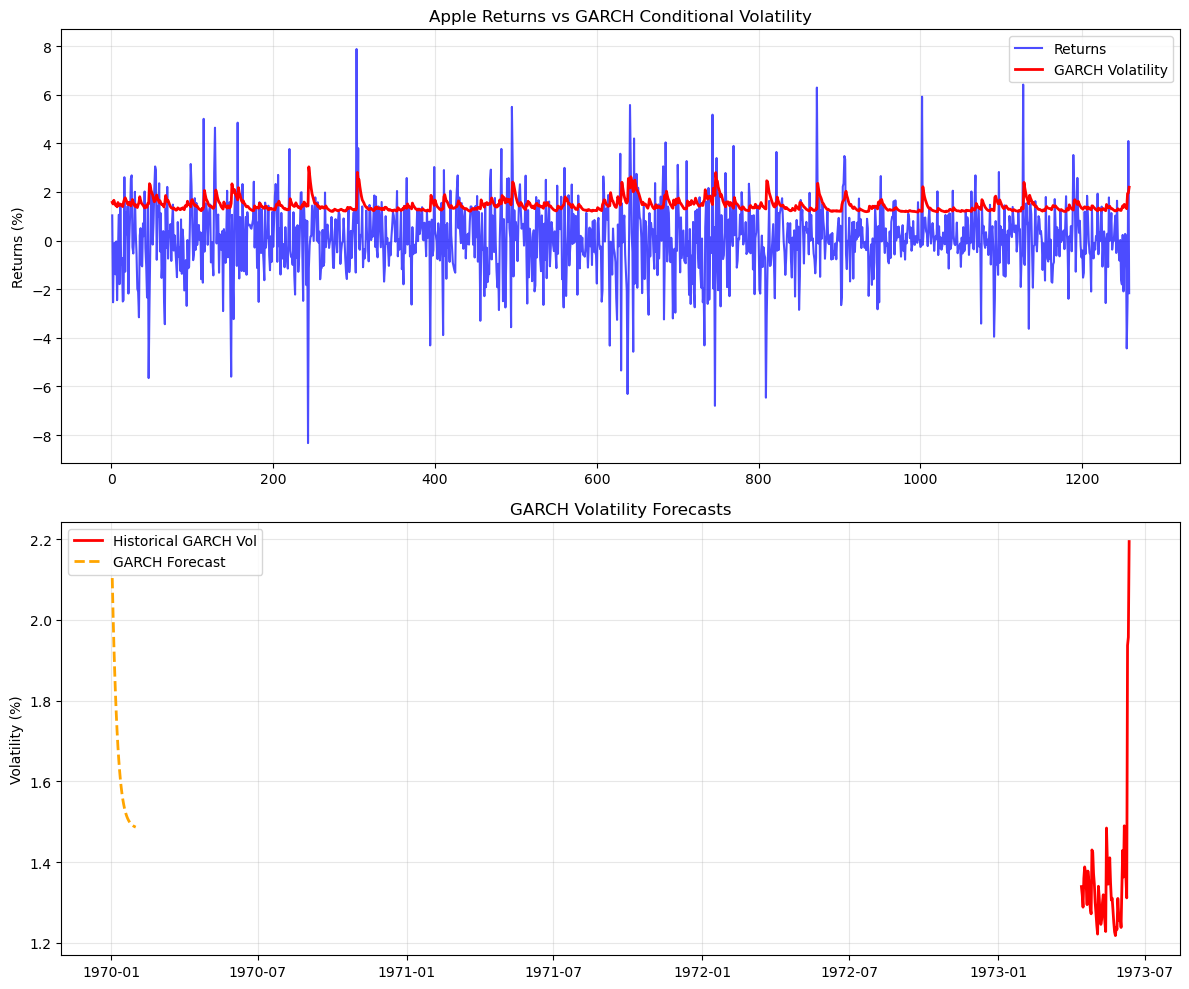

In [27]:
# Example usage:
# Assuming you have your fitted model 'res' and returns data
analysis = GARCHAnalysis(res, returns)
forecasts = analysis.generate_volatility_forecasts(horizon=30)
analysis.plot_volatility_evolution()

# # Compare models
# comparison = analysis.compare_volatility_models(returns, test_size=252)
# accuracy_results = analysis.evaluate_forecast_accuracy(comparison)
# print(accuracy_results)

# # Risk management applications
# analysis.risk_management_applications()

In [24]:
forecasts